<a href="https://colab.research.google.com/github/codermine29/nifty/blob/main/UpdatedAllocationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance pandas --quiet
!pip install requests pandas --quiet



In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import requests
import pandas as pd
from datetime import datetime, timedelta
import os
import time

import os


In [5]:
# 📁 Step 3: Create a function to download and save data
def download_and_save(ticker, name, start_date, end_date, save_dir="data/raw"):
    print(f"Downloading {name} data...")
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        data.reset_index(inplace=True)
        os.makedirs(save_dir, exist_ok=True)
        filename = f"{name.replace(' ', '_').lower()}_data.csv"
        filepath = os.path.join(save_dir, filename)
        data.to_csv(filepath, index=False)
        print(f"{name} data saved to {filepath}")
        return data
    except Exception as e:
        print(f"Failed to fetch {name}: {e}")
        return None


In [6]:
# 📅 Step 4: Set time range
start_date = (datetime.today() - timedelta(days=5*365)).date()
end_date = datetime.today().date()


In [7]:
# 📊 Step 5: Tickers to download
indices = {
    "^NSEI": "Nifty 50",
    "NIFTY_MIDCAP_100.NS": "Nifty Midcap 100"
}


In [8]:
# 🚀 Step 6: Loop through and fetch each dataset
for ticker, name in indices.items():
    download_and_save(ticker, name, start_date, end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Nifty 50 data saved to data/raw/nifty_50_data.csv


[*********************100%***********************]  1 of 1 completed

Nifty Midcap 100 data saved to data/raw/nifty_midcap_100_data.csv


In [9]:
from datetime import datetime, timedelta

start_date = (datetime.today() - timedelta(days=5*365)).date()
end_date = datetime.today().date()

download_and_save("NIFTY_MIDCAP_100.NS", "Nifty Midcap 100", start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Nifty Midcap 100 data saved to data/raw/nifty_midcap_100_data.csv


Price,Date,Close,High,Low,Open,Volume
Ticker,,NIFTY_MIDCAP_100.NS,NIFTY_MIDCAP_100.NS,NIFTY_MIDCAP_100.NS,NIFTY_MIDCAP_100.NS,NIFTY_MIDCAP_100.NS
0,2020-04-13,12375.700195,12640.400391,12242.599609,12640.349609,0
1,2020-04-15,12533.500000,12813.549805,12417.900391,12538.799805,0
2,2020-04-16,12760.349609,12807.799805,12421.299805,12491.049805,0
3,2020-04-17,13046.799805,13230.500000,12900.549805,13128.799805,0
4,2020-04-20,13113.650391,13308.849609,13043.450195,13201.000000,0
...,...,...,...,...,...,...
1226,2025-04-02,52053.199219,52082.101562,50893.449219,51358.750000,0
1227,2025-04-03,52162.148438,52210.750000,51562.648438,51587.250000,0
1228,2025-04-04,50645.949219,52059.898438,50349.800781,52044.199219,0


In [10]:
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.nseindia.com/",
}


In [11]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
import os

def get_session_with_headers():
    session = requests.Session()
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
        "Accept": "application/json",
        "Accept-Language": "en-US,en;q=0.9",
        "Referer": "https://www.nseindia.com/reports-indices-historical-vix",
    }
    session.headers.update(headers)
    response = session.get("https://www.nseindia.com", timeout=10)
    if response.status_code == 200:
        print("✅ NSE session established.")
        return session
    else:
        raise Exception("❌ Could not establish session")

def download_vix_data_between(session, from_date_str, to_date_str):
    url = f"https://www.nseindia.com/api/historical/volatility-index?from={from_date_str}&to={to_date_str}"
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()["data"]
        df = pd.DataFrame(data)
        df["from"] = from_date_str
        df["to"] = to_date_str
        print(f"✅ Data from {from_date_str} to {to_date_str}: {len(df)} rows")
        return df
    except Exception as e:
        print(f"❌ Failed from {from_date_str} to {to_date_str}: {e}")
        return pd.DataFrame()

def fetch_vix_backward(years=5):
    session = get_session_with_headers()
    all_data = pd.DataFrame()

    today = datetime.today()
    end = today

    for _ in range(years):
        start = end - timedelta(days=365)

        # Skip if the 'to' date is in the future
        if end.date() > today.date():
            end = today

        from_str = start.strftime("%d-%m-%Y")
        to_str = end.strftime("%d-%m-%Y")

        df = download_vix_data_between(session, from_str, to_str)
        all_data = pd.concat([all_data, df], ignore_index=True)

        end = start  # move one year back
        time.sleep(2)  # polite pause

    return all_data

# Run and save
vix_df = fetch_vix_backward(years=5)
os.makedirs("data/raw", exist_ok=True)
vix_df.to_csv("data/raw/india_vix_data.csv", index=False)
print("📁 Saved to data/raw/india_vix_data.csv")


✅ NSE session established.
❌ Failed from 09-04-2024 to 09-04-2025: 404 Client Error: Not Found for url: https://www.nseindia.com/api/historical/volatility-index?from=09-04-2024&to=09-04-2025
❌ Failed from 10-04-2023 to 09-04-2024: 404 Client Error: Not Found for url: https://www.nseindia.com/api/historical/volatility-index?from=10-04-2023&to=09-04-2024
❌ Failed from 10-04-2022 to 10-04-2023: 404 Client Error: Not Found for url: https://www.nseindia.com/api/historical/volatility-index?from=10-04-2022&to=10-04-2023
❌ Failed from 10-04-2021 to 10-04-2022: 404 Client Error: Not Found for url: https://www.nseindia.com/api/historical/volatility-index?from=10-04-2021&to=10-04-2022
❌ Failed from 10-04-2020 to 10-04-2021: 404 Client Error: Not Found for url: https://www.nseindia.com/api/historical/volatility-index?from=10-04-2020&to=10-04-2021
📁 Saved to data/raw/india_vix_data.csv


DOWNLOADED MANUALLY

In [12]:
#merging downloading
import pandas as pd
import glob
import os

# Step 1: Create target folder if not exists
os.makedirs("data/raw", exist_ok=True)

# Step 2: Load all hist_india_vix files
vix_files = glob.glob("hist_india_vix_-*.csv")

print(f"Found {len(vix_files)} files.")

# Step 3: Read and clean each one
vix_dfs = []
for f in vix_files:
    df = pd.read_csv(f)
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df["source_file"] = os.path.basename(f)
    vix_dfs.append(df)

# Step 4: Concatenate all
vix_full = pd.concat(vix_dfs, ignore_index=True)

# Optional: Parse 'date' column to datetime if it's present
if 'date' in vix_full.columns:
    vix_full['date'] = pd.to_datetime(vix_full['date'], dayfirst=True)

# Step 5: Save combined file
vix_full.to_csv("data/raw/india_vix_data.csv", index=False)
print("✅ Combined VIX data saved to: data/raw/india_vix_data.csv")


Found 5 files.
✅ Combined VIX data saved to: data/raw/india_vix_data.csv


<ipython-input-12-e17fdff9c67b>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix_full['date'] = pd.to_datetime(vix_full['date'], dayfirst=True)


In [13]:
vix_full['date'].head()
vix_full['date'].dtypes


dtype('<M8[ns]')

In [14]:
import os

# Show all RBI repo files
for f in os.listdir():
    if f.startswith("44T") or f.startswith("43T"):
        print(f)


44TAE1611FA26F3470B951F457B049CA4F3.XLSX
44T_150920233CF90B8B3AAF4CDE86870500A121DF76.XLSX
44T_150920225ACB551F824343978984482FDDBD39A1.XLSX
44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX
43T_13092024E96F4BEB54964C44B36179FFDF282EF5.XLSX


In [15]:
import pandas as pd

file_names = [
    "44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX",
    "44TAE1611FA26F3470B951F457B049CA4F3.XLSX",
    "43T_13092024E96F4BEB54964C44B36179FFDF282EF5.XLSX",
    "44T_150920225ACB551F824343978984482FDDBD39A1.XLSX",
    "44T_150920233CF90B8B3AAF4CDE86870500A121DF76.XLSX",
]

for file in file_names:
    xls = pd.ExcelFile(file)
    print(f"{file} → {xls.sheet_names}")


44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX → ['T_44(i)', 'T_44(ii)']
44TAE1611FA26F3470B951F457B049CA4F3.XLSX → ['T_44(i)', 'T_44(ii)']
43T_13092024E96F4BEB54964C44B36179FFDF282EF5.XLSX → ['T_43(I)', 'T_43(II)']
44T_150920225ACB551F824343978984482FDDBD39A1.XLSX → ['T_44(i)', 'T_44(ii)']
44T_150920233CF90B8B3AAF4CDE86870500A121DF76.XLSX → ['T_44', 'T_44(I)']


In [16]:
sheets_to_try = {
    "44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX": "T_44(i)",
    "44TAE1611FA26F3470B951F457B049CA4F3.XLSX": "T_44(i)",
    "43T_13092024E96F4BEB54964C44B36179FFDF282EF5.XLSX": "T_43(I)",
    "44T_150920225ACB551F824343978984482FDDBD39A1.XLSX": "T_44(i)",
    "44T_150920233CF90B8B3AAF4CDE86870500A121DF76.XLSX": "T_44",
}

for file, sheet in sheets_to_try.items():
    print(f"\n🔹 Preview from {file} (Sheet: {sheet})")
    df = pd.read_excel(file, sheet_name=sheet)
    print(df.head())



🔹 Preview from 44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX (Sheet: T_44(i))
   Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0         NaN  TABLE 44 : MAJOR MONETARY POLICY RATES AND RES...        NaN   
1         NaN                                         (Per cent)        NaN   
2         NaN                                     Effective Date  Bank Rate   
3         NaN                                                NaN        NaN   
4         NaN                                                  1          2   

            Unnamed: 3 Unnamed: 4                  Unnamed: 5  \
0                  NaN        NaN                         NaN   
1                  NaN        NaN                         NaN   
2  Fix Range LAF Rates        NaN  Marginal Standing Facility   
3                 Repo    Reverse                         NaN   
4                    3          4                           5   

           Unnamed: 6                 Unnamed: 7  
0        

In [17]:
df = pd.read_excel("44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX", sheet_name="T_44(i)", skiprows=10)
print(df.columns)
print(df.dtypes)
df.head(5)


Index(['Unnamed: 0', 2005-04-29 00:00:00, '-', '-.1', 5, '-.2', '-.3', '-.4'], dtype='object')
Unnamed: 0             float64
2005-04-29 00:00:00     object
-                       object
-.1                     object
5                       object
-.2                     object
-.3                     object
-.4                     object
dtype: object


,Unnamed: 0,2005-04-29 00:00:00,-,-.1,5,-.2,-.3,-.4
0,NaN,2005-10-26 00:00:00,-,6.25,5.25,-,-,-
1,NaN,2006-01-24 00:00:00,-,6.5,5.5,-,-,-
2,NaN,2006-06-08 00:00:00,-,6.75,5.75,-,-,-
3,NaN,2006-07-25 00:00:00,-,7,6,-,-,-
4,NaN,2006-10-31 00:00:00,-,7.25,-,-,-,-


In [18]:
df = pd.read_excel("44TF2910755D03B4ECFA38E07F37FD1BB42.XLSX", sheet_name="T_44(i)", skiprows=10)

# Extract the actual Date and Repo Rate columns
df = df.iloc[:, [1, 3]]
df.columns = ["Date", "Repo Rate"]

df.head()


,Date,Repo Rate
0,2005-10-26 00:00:00,6.25
1,2006-01-24 00:00:00,6.5
2,2006-06-08 00:00:00,6.75
3,2006-07-25 00:00:00,7
4,2006-10-31 00:00:00,7.25


In [19]:
import pandas as pd

# Manually verified RBI repo rate changes (2020 to 2024)
repo_df = pd.DataFrame({
    "Date": pd.to_datetime([
        "2020-03-27", "2020-05-22", "2022-05-04", "2022-06-08",
        "2022-08-05", "2022-09-30", "2022-12-07", "2023-02-08"
    ]),
    "Repo Rate": [4.40, 4.00, 4.40, 4.90, 5.40, 5.90, 6.25, 6.50]
})

# Save to file
repo_df.to_csv("data/raw/rbi_repo_rate_data.csv", index=False)

# Preview
repo_df.head()


,Date,Repo Rate
0,2020-03-27,4.4
1,2020-05-22,4.0
2,2022-05-04,4.4
3,2022-06-08,4.9
4,2022-08-05,5.4


In [20]:
import pandas as pd
import os

# ------------------------------
# 💡 Mutual Fund Cash Allocation (as of April 2025)
# ------------------------------
# We selected 5 popular equity mutual funds:
# 1. Axis Bluechip Fund             → Cash %: -1.06
# 2. ICICI Prudential Flexicap Fund → Cash %: 3.24
# 3. SBI Large & Midcap Fund        → Cash %: 3.34
# 4. HDFC Flexicap Fund             → Cash %: 7.88
# 5. Mirae Asset Large Cap Fund     → Cash %: 0.48
#
# ➕ These values were sourced from the "Portfolio → Asset Allocation"
#    section on Value Research Online for each fund.
#
# 🧮 Average Cash Allocation:
#    = (-1.06 + 3.24 + 3.34 + 7.88 + 0.48) / 5
#    = 13.88 / 5 = 2.776%
#
# This average represents the mutual fund liquidity position and will
# be used as a liquidity indicator feature.

# ------------------------------
# ✅ Create a DataFrame
# ------------------------------
data = {
    "date": ["2025-04-07"],  # Snapshot date
    "cash_pct": [2.776]       # Averaged cash holding %
}
df = pd.DataFrame(data)

# ------------------------------
# 💾 Save to CSV
# ------------------------------
os.makedirs("data/raw", exist_ok=True)
df.to_csv("data/raw/mutual_fund_cash_pct.csv", index=False)

# ✅ Preview and confirm
print("✅ Saved to data/raw/mutual_fund_cash_pct.csv")
df.head()


✅ Saved to data/raw/mutual_fund_cash_pct.csv


,date,cash_pct
0,2025-04-07,2.776


In [22]:
pd.read_csv("data/raw/india_vix_data.csv").columns


Index(['date', 'open', 'high', 'low', 'close', 'prev._close', 'change',
       '%_change', 'source_file'],
      dtype='object')

In [30]:
import pandas as pd

# Load Nifty 50
nifty = pd.read_csv("data/raw/nifty_50_data.csv", parse_dates=["Date"])
nifty = nifty[["Date", "Close"]].rename(columns={"Close": "nifty_close"})

# Load Nifty Midcap 100
midcap = pd.read_csv("data/raw/nifty_midcap_100_data.csv", parse_dates=["Date"])
midcap = midcap[["Date", "Close"]].rename(columns={"Close": "midcap_close"})

# Load India VIX
vix = pd.read_csv("data/raw/india_vix_data.csv", parse_dates=["date"])
vix = vix[["date", "close"]].rename(columns={"date": "Date", "close": "vix_close"})

# Load Repo Rate
repo = pd.read_csv("data/raw/rbi_repo_rate_data.csv", parse_dates=["Date"])

# Forward-fill repo rate to daily frequency
repo = repo.set_index("Date").resample("D").ffill().reset_index()

# Load Mutual Fund Cash %
mf_cash = pd.read_csv("data/raw/mutual_fund_cash_pct.csv", parse_dates=["date"])
mf_cash = mf_cash.rename(columns={"date": "Date"})

mf_cash_full["cash_pct"] = mf_cash_full["cash_pct"].bfill()

# Preview loaded data
nifty.head(), midcap.head(), vix.head(), repo.head(), mf_cash.head()


(        Date      nifty_close
 0        NaT            ^NSEI
 1 2020-04-13   8993.849609375
 2 2020-04-15  8925.2998046875
 3 2020-04-16  8992.7998046875
 4 2020-04-17          9266.75,
         Date         midcap_close
 0        NaT  NIFTY_MIDCAP_100.NS
 1 2020-04-13     12375.7001953125
 2 2020-04-15              12533.5
 3 2020-04-16      12760.349609375
 4 2020-04-17     13046.7998046875,
         Date  vix_close
 0 2022-04-07    18.9975
 1 2022-04-08    17.6875
 2 2022-04-11    18.2700
 3 2022-04-12    18.1575
 4 2022-04-13    17.7850,
         Date  Repo Rate
 0 2020-03-27        4.4
 1 2020-03-28        4.4
 2 2020-03-29        4.4
 3 2020-03-30        4.4
 4 2020-03-31        4.4,
         Date  cash_pct
 0 2025-04-07     2.776)

In [32]:
# Step-by-step left joins on Date
merged = nifty.merge(midcap, on="Date", how="left")
merged = merged.merge(vix, on="Date", how="left")
merged = merged.merge(repo, on="Date", how="left")
merged = merged.merge(mf_cash, on="Date", how="left")

# Rename repo column for clarity
merged = merged.rename(columns={"Repo Rate": "repo_rate", "cash_pct": "mf_cash_pct"})

# Preview the final merged dataset
merged.head()



,Date,nifty_close,midcap_close,vix_close,repo_rate,mf_cash_pct
0,NaT,^NSEI,NIFTY_MIDCAP_100.NS,NaN,NaN,NaN
1,2020-04-13,8993.849609375,12375.7001953125,51.4575,4.4,NaN
2,2020-04-15,8925.2998046875,12533.5,49.7350,4.4,NaN
3,2020-04-16,8992.7998046875,12760.349609375,46.0950,4.4,NaN
4,2020-04-17,9266.75,13046.7998046875,42.5925,4.4,NaN


In [33]:
# Remove earlier version
merged = merged.drop(columns=["mf_cash_pct"], errors="ignore")

# Merge again with fixed backfilled cash data
merged = merged.merge(
    mf_cash_full.rename(columns={"cash_pct": "mf_cash_pct"}),
    on="Date", how="left"
)

merged.head()


,Date,nifty_close,midcap_close,vix_close,repo_rate,mf_cash_pct
0,NaT,^NSEI,NIFTY_MIDCAP_100.NS,NaN,NaN,NaN
1,2020-04-13,8993.849609375,12375.7001953125,51.4575,4.4,2.776
2,2020-04-15,8925.2998046875,12533.5,49.7350,4.4,2.776
3,2020-04-16,8992.7998046875,12760.349609375,46.0950,4.4,2.776
4,2020-04-17,9266.75,13046.7998046875,42.5925,4.4,2.776


In [35]:
import os

# Create directory if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Now save the file
merged.to_csv("data/processed/liquidity_features.csv", index=False)

print("✅ Liquidity features saved to: data/processed/liquidity_features.csv")
merged.head()


✅ Liquidity features saved to: data/processed/liquidity_features.csv


,Date,nifty_close,midcap_close,vix_close,repo_rate,mf_cash_pct
0,NaT,^NSEI,NIFTY_MIDCAP_100.NS,NaN,NaN,NaN
1,2020-04-13,8993.849609375,12375.7001953125,51.4575,4.4,2.776
2,2020-04-15,8925.2998046875,12533.5,49.7350,4.4,2.776
3,2020-04-16,8992.7998046875,12760.349609375,46.0950,4.4,2.776
4,2020-04-17,9266.75,13046.7998046875,42.5925,4.4,2.776


In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Copy dataset
features = merged.copy()

# Drop rows with any NaNs
features = features.dropna().reset_index(drop=True)

# Select features to normalize
score_inputs = features[["vix_close", "repo_rate", "mf_cash_pct"]].copy()

# Invert features where higher = stress
score_inputs["vix_close"] = -score_inputs["vix_close"]
score_inputs["repo_rate"] = -score_inputs["repo_rate"]

# Normalize to [0, 1]
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(score_inputs), columns=score_inputs.columns)

# Weighted sum (adjust weights as needed)
features["liquidity_score"] = (
    0.4 * normalized["vix_close"] +
    0.4 * normalized["repo_rate"] +
    0.2 * normalized["mf_cash_pct"]
)

# Preview result
features[["Date", "liquidity_score"]].head()


,Date,liquidity_score
0,2020-04-13,0.336000
1,2020-04-15,0.353332
2,2020-04-16,0.389959
3,2020-04-17,0.425202
4,2020-04-20,0.416523


In [37]:
def get_cash_allocation(score):
    if score >= 0.8:
        return 100.0
    elif score <= 0.3:
        return 0.0
    else:
        # Scale linearly from 0% to 100%
        return (score - 0.3) / (0.8 - 0.3) * 100


In [38]:
# Apply allocation function
features["cash_allocation_pct"] = features["liquidity_score"].apply(get_cash_allocation)

# Preview result
features[["Date", "liquidity_score", "cash_allocation_pct"]].head()


,Date,liquidity_score,cash_allocation_pct
0,2020-04-13,0.336000,7.200000
1,2020-04-15,0.353332,10.666449
2,2020-04-16,0.389959,17.991774
3,2020-04-17,0.425202,25.040387
4,2020-04-20,0.416523,23.304648


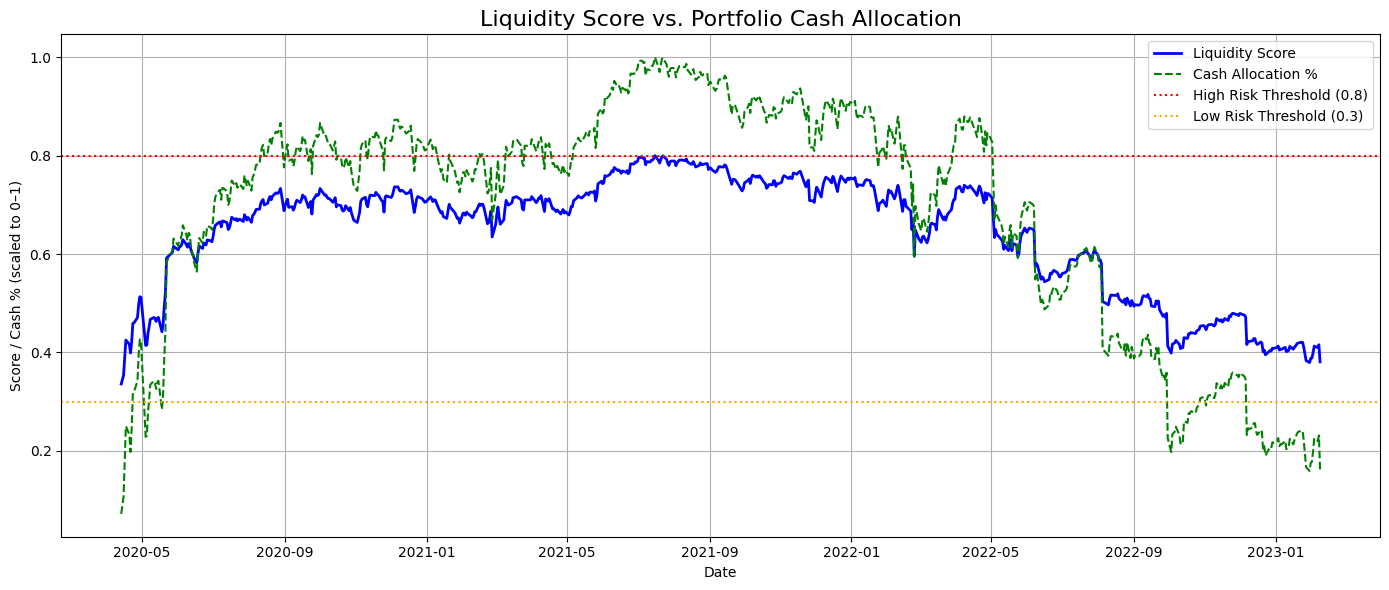

In [39]:
import matplotlib.pyplot as plt

# Set up plot
plt.figure(figsize=(14, 6))

# Plot liquidity score
plt.plot(features["Date"], features["liquidity_score"], label="Liquidity Score", color="blue", linewidth=2)

# Plot cash allocation %
plt.plot(features["Date"], features["cash_allocation_pct"] / 100, label="Cash Allocation %", color="green", linestyle="--")

# Threshold lines
plt.axhline(0.8, color="red", linestyle=":", label="High Risk Threshold (0.8)")
plt.axhline(0.3, color="orange", linestyle=":", label="Low Risk Threshold (0.3)")

# Formatting
plt.title("Liquidity Score vs. Portfolio Cash Allocation", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Score / Cash % (scaled to 0–1)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [40]:
features.to_csv("data/processed/final_liquidity_model_data.csv", index=False)


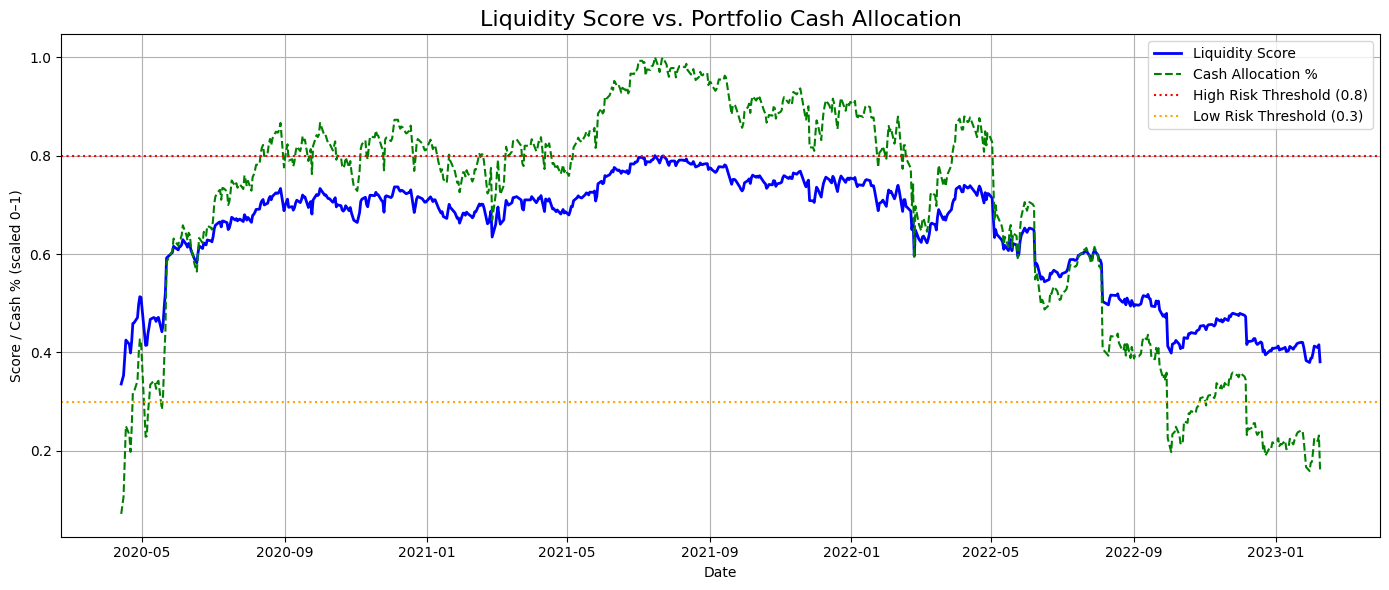

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(features["Date"], features["liquidity_score"], label="Liquidity Score", color="blue", linewidth=2)
plt.plot(features["Date"], features["cash_allocation_pct"] / 100, label="Cash Allocation %", color="green", linestyle="--")
plt.axhline(0.8, color="red", linestyle=":", label="High Risk Threshold (0.8)")
plt.axhline(0.3, color="orange", linestyle=":", label="Low Risk Threshold (0.3)")
plt.title("Liquidity Score vs. Portfolio Cash Allocation", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Score / Cash % (scaled 0–1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("data/processed/liquidity_score_vs_cash_allocation.png", dpi=300)
